<font size = '5'> **Relevence of Error: What Drives Motor Adaptation** </font>

link - https://journals-physiology-org.udel.idm.oclc.org/doi/full/10.1152/jn.90545.2008

**Summary -**

Not all movement errors are relevent to our own action. For example, when the wind blows towards and drives away the tennis ball from the intended trajectory, the nervous system should not adapt to such errors. So the paper hypothesise <u> the nervous system estimates the relevence of each observed error and adapts strongly on the relevent errors. </u>

**Experiment -**

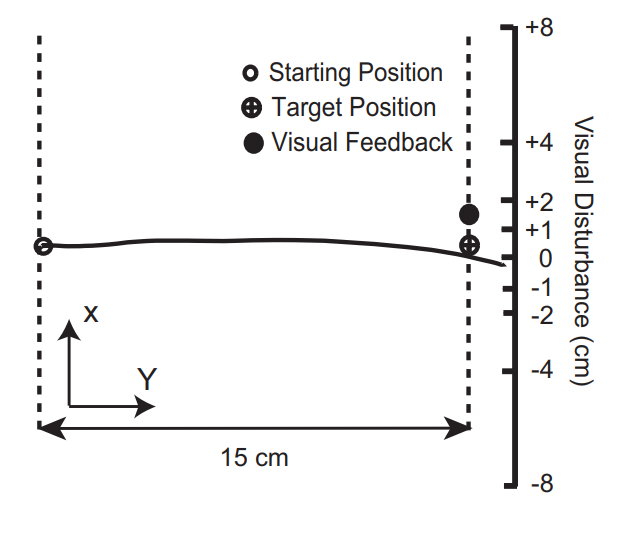

1 - subject reaches a 15cm target in the y direction. Visual feedback is deviated by the amount shown in the figure. The subject cannot see the cursor until it reaches the target position.

2 - similar to the condition 1. The targets are now only 5cm away from the home position.

**Generative Model -**

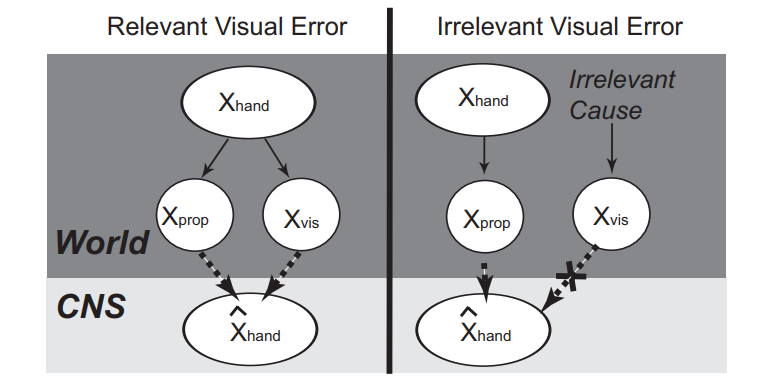

If the visual error is inferred as relevent, both proprioceptive and visual cues will be used to infer the hand position. On the other hand, if the visual error is irrevelent only the proprioceptive cue is used to infer the hand location. 

We can represent this by the Baye's rule. 

$$ p(relevent|x_{vis}, x_{prop}) = \frac{p(relevent)p(x_{vis}, x_{prop} |relevent)}{p(x_{vis}, x_{prop})}$$
where, 

$$p(x_{vis}, x_{prop}) = p(relevent)p(x_{vis}, x_{prop}|relevent) + p(irrelevent)p(x_{vis}, x_{prop}|irrevelent)$$

given a flat prior,

$$ p(x_{vis}, x_{prop}|relevent) = \int{p(x_{vis}|x_{hand}) p(x_{prop}|x_{hand})dx_{hand}}$$

if the above equation is $N(x_{vis}, \sigma^2)$, 

$$p(relevent | x_{vis}, x_{prop}) = \frac{N(x_{vis}, \sigma^2)}{N(x_{vis}, \sigma^2) + c}$$

where c is $\frac{p(x_{vis}, x_{prop}|irrelevent)p(irrelevent)}{p(relevent)}$

The assumed cost function is a squared error between the estimated position and the target position. 

$$Cost = p(relevent| x_{vis}, x_{prop}) (x_{relevent} - x_{target})^2 + p(irrelevent| x_{vis}, x_{prop}) (x_{irrelevent} - x_{target})^2$$
.
.
.
.
.
.
Final hand position was calculated using, 

$$\hat{x} = \sum^{4}_{\Delta{t} = 1} x_{vis, \Delta{t}} S(\Delta{t}) \frac{N(x_{vis}, \sigma^2)}{N(x_{vis}, \sigma^2) + c}$$

In [7]:
#import libraires
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets

In [54]:
#variance and mean of the visual estimate 
sigma_v = 1

#variance and mean of the proprioceptive estimate
sigma_p = 1

#parameter c
c = 0.1

#parameter s
s = 0.14

#combined sigma

def comb(sigma_v, sigma_p):
    
    return (sigma_v**2 * sigma_p**2)/(sigma_v**2 + sigma_p**2)

#create an empty list to append trials
trials = []

for i in range(100):
    x_vis = np.random.choice([-8, -4, -2, -1, 0, 1, 2, 4, 8])
    sigma = comb(sigma_v, sigma_p)
    
    if x_vis == 0:
        x_v = np.random.normal(x_vis, sigma)
        
        #hand position
        x_h = x_v * s * x_v/(x_v + c)
        
    else:
        x_v = np.random.normal(x_vis, sigma)
        
        #hand position
        t = x_vis * s * x_v/(x_v + c)
        
    trials.append((i, x_vis, t))

In [55]:
x_n8 = 0
x_n4 = 0
x_n2 = 0
x_n1 = 0
x_0 = 0
x_8 = 0
x_4 = 0
x_2 = 0
x_1 = 0

for k in range(1,100):
    
    if trials[k][1] == -8:
        x_n8 += trials[k-1][2]
    
    if trials[k][1] == -4:
        x_n4 += trials[k-1][2]
        
    if trials[k][1] == -2:
        x_n2 += trials[k-1][2]
    
    if trials[k][1] == -1:
        x_n1 += trials[k-1][2]
        
    if trials[k][1] == 0:
        x_0 += trials[k-1][2]
        
    if trials[k][1] == 8:
        x_8 += trials[k-1][2]
    
    if trials[k][1] == 4:
        x_4 += trials[k-1][2]
        
    if trials[k][1] == 2:
        x_2 += trials[k-1][2]
    
    if trials[k][1] == 1:
        x_1 += trials[k-1][2] 

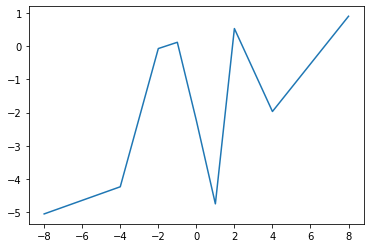

In [56]:
y = [x_n8, x_n4, x_n2, x_n1, x_0, x_1, x_2, x_4, x_8]

x = [-8, -4, -2, -1, 0, 1, 2, 4, 8]

plt.plot(x, y)